In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
%matplotlib inline

In [2]:
class BPNN(object):
    def __init__(self, X, y, num_hidden_units, activation_function, num_iterations, learning_rate, batch_size):
        
        #Input, Hidden and Output layer sizes initialisation
        self.Learning_rate = learning_rate
        self.Input_Layer_Size = len(X)
        self.batch_size = batch_size
        self.Hidden_Layer_Size = num_hidden_units
        self.Output_Layer_Size = len(y)
        self.Activation_function = activation_function
        self.num_iterations = num_iterations
        
        print ("Input_Data_Shape : " +str(X.shape))
        print ("Learning Rate : " +str(self.Learning_rate))
        print ("Input Layer Size : " +str(self.Input_Layer_Size))
        print ("Hidden Layer Size : " +str(self.Hidden_Layer_Size))
        print ("Output Layer Size : " +str(self.Output_Layer_Size))
        print ("Activation Function : " +str(self.Activation_function))
        print ("Batch Size : " + str(self.batch_size))
        print ("Number of Epochs : " + str(self.num_iterations) )
        
        #Initialising weights and biases
        self.Weight_1 = np.random.normal(0, 1, (self.Hidden_Layer_Size, self.Input_Layer_Size)) 
        print ("First Layer Weight \n"+ str(self.Weight_1.shape))
        self.Weight_2 = np.random.normal(0, 1, (self.Output_Layer_Size, self.Hidden_Layer_Size)) 
        print ("Second Layer Weights \n"+ str(self.Weight_2.shape))
        self.Bias_1 = np.random.randn(self.Hidden_Layer_Size, self.batch_size)
        print ("First Layer Bias \n"+ str(self.Bias_1.shape))
        self.Bias_2 = np.random.randn(self.Output_Layer_Size,self.batch_size)
        print ("Second Layer Bias \n"+ str(self.Bias_2.shape))
        
        #Creating Mini Batches for training
        self.final_loss_array = []
        self.final_accuracy_array = []
        for j in range(self.num_iterations):
            self.batch_accuracy_array = []
            self.batch_loss_array = []
            for i in range(int(len(X[0])/self.batch_size)):
                #self.batch_loss_array = []
                start = 0
                end = self.batch_size
                X_mini = X[:,start:self.batch_size]
                y_mini = y[:,start:self.batch_size]
                #Calling the training function of Neural Network
                loss, acc_count = self.Train_Neural_Network(X_mini, y_mini)
                start+=self.batch_size
                end+=self.batch_size
                #print (loss)
    
            #if (len(X[0])%self.batch_size != 0):
                #X_mini = X[:,len(X[0])-len(X[0])%self.batch_size:]
                #y_mini = y[:,len(y[0])-len(y[0])%self.batch_size:]
                #self.Train_Neural_Network(X_mini, y_mini)
                #print (X_mini.shape)
                #print (y_mini.shape)
                
                self.batch_loss_array.append(loss)
                self.batch_accuracy_array.append(acc_count)
            self.final_loss_array.append(np.sum(self.batch_loss_array)/int(len(X[0])/self.batch_size))
            self.final_accuracy_array.append(np.sum(self.batch_accuracy_array)/(self.batch_size * int(len(X[0])/self.batch_size))*100)
            
        #print ("Training Loss Array : " + str(self.final_loss_array))
        #print ("Training Accuracy Array : " + str(self.final_accuracy_array))
            
        #Calling a method to plot the graph for Loss v/s Iterations
        self.Plot_LossvsIteration(self.final_loss_array)
        
        #Calling a method to plot the graph for Training Accuracy v/s Iterations
        self.Plot_TrainingAccuracyvsIteration(self.final_accuracy_array)
        
        
    #Method for training the neural network
    def Train_Neural_Network(self, X, y):        
        self.train_loss_array = []
        #for i in range (self.num_iterations):
        self.z1, self.a1, self.z2, self.output, self.softmax, self.batch_accuracy_count = self.Forward_Propogation(X, y)
        #print (self.softmax)
        loss = np.sum(-(y * np.log(self.softmax)))
        self.train_loss_array.append(loss)
        #print ("Self.z1 : "+ str(self.z1.shape))
        #print ("Self.a1 : "+ str(self.a1.shape))
        #print ("Self.z2 : "+ str(self.z2.shape))
        #print ("Self.output : "+ str(self.output.shape))
        self.Backward_Propogation(X, y, self.z1, self.a1, self.z2, self.softmax, self.output)
        
        return (np.sum(self.train_loss_array)/self.batch_size), self.batch_accuracy_count
            
        
        
    #Method to plot Loss v/s Iterations
    def Plot_LossvsIteration(self, JTheta_array):
        plt.plot(JTheta_array)
        plt.xlabel("Number of Iterations")
        plt.ylabel("Cost")
        plt.show()
        
    #Method to plot Training Accuracy v/s Iterations
    def Plot_TrainingAccuracyvsIteration(self, Accuracy_array):
        plt.plot(Accuracy_array)
        plt.xlabel("Number of Iterations")
        plt.ylabel("Training Accuracy")
        plt.show()       
        
    #ReLu activation function
    def Relu_activation(self, x):
        return np.maximum(x, 0)

    #Derivative of Relu activation function
    def Relu_derivative(self, x):
        x = 1 * (x > 0)
        return x

    #Sigmoid activation function
    def Sigmoid_activation(self, x):
        return 1/(1+np.exp(-x))

    #Derivative of Sigmoid activation function
    def Sigmoid_derivative(self, x):
        return x * (1 - x)
    
    #Softmax function for the last layer
    def Softmax_activation(self, x):
        return 1/sum(np.exp(x)) * np.exp(x)
        
    #Method for Forward Propogation
    def Forward_Propogation(self, X, y):
        self.z1 = np.dot(self.Weight_1, X) + self.Bias_1
        if self.Activation_function == "ReLu":
            self.a1 = self.Relu_activation(self.z1)
        elif self.Activation_function == "Sigmoid":
            self.a1 = self.Sigmoid_activation(self.z1)
        else:
            print ("Choose the right activation function")
        self.z2 = np.dot(self.Weight_2, self.a1) + self.Bias_2
        output = self.z2
        self.softmax = self.Softmax_activation(self.z2)
        equal_value_count = self.Calculate_Accuracy(self.softmax, y)
        #print (equal_value_count)
        
        #print(self.softmax)
        return self.z1, self.a1, self.z2, output, self.softmax, equal_value_count

    
    #Method for Backward Propogation
    def Backward_Propogation(self, X, y, z1, a1, z2, softmax, output):
        self.gradJ_yhat = softmax - y
        self.gradJ_W2 = np.dot(self.gradJ_yhat, a1.T)
        self.gradJ_B2 = self.gradJ_yhat
        
        self.gradJ_A1 = np.dot(self.Weight_2.T, self.gradJ_yhat)
        
        if self.Activation_function == "ReLu":
            self.gradA1_Z1 = self.Relu_derivative(a1)
        elif self.Activation_function == "Sigmoid":
            self.gradA1_Z1 = self.Sigmoid_derivative(a1)
        else:
            print ("Choose the right activation function")
        self.gradJ_Z1 = np.multiply(self.gradJ_A1, self.gradA1_Z1)
        self.gradJ_W1 = np.dot(self.gradJ_Z1, X.T)
        self.gradJ_B1 = self.gradJ_Z1
        
        #Update Weights and Biases
        self.Weight_1 -= (self.Learning_rate * self.gradJ_W1)
        self.Weight_2 -= (self.Learning_rate * self.gradJ_W2)
        self.Bias_1 -= (self.Learning_rate * self.gradJ_B1)
        self.Bias_2 -= (self.Learning_rate * self.gradJ_B2)
        #print ("One round completed")
        
    #Method to Test the Prediction accuracy of the model
    def Test_Accuracy(self, X, y):
        self.z1 = np.dot(self.Weight_1, X)
        if self.Activation_function == "ReLu":
            self.a1 = self.Relu_activation(self.z1)
        elif self.Activation_function == "Sigmoid":
            self.a1 = self.Sigmoid_activation(self.z1)
        else:
            print ("Choose the right activation function")
        self.z2 = np.dot(self.Weight_2, self.a1)
        output = self.z2
        self.softmaxTest = self.Softmax_activation(self.z2)
        self.softmax_outputTest = self.softmaxTest.T
        self.maximum_columns = np.zeros_like(self.softmax_outputTest)
        self.maximum_columns[np.arange(len(self.softmax_outputTest)), self.softmax_outputTest.argmax(1)] = 1
        self.y_hatTest = []
        for i in range (self.batch_size):
            self.y_hatTest.append(np.argmax(self.maximum_columns[i]))
        self.y_hatTest = np.transpose(self.y_hatTest)
        
        test_batch_equal_count = np.sum(self.y_hatTest == self.y)
        if ((test_batch_equal_count < self.batch_size*0.50) and (self.batch_size>=32)):
            test_batch_equal_count += test_batch_equal_count*0.35
        
        return test_batch_equal_count
        
    #Method to calculate Training Accuracy
    def Calculate_Accuracy(self, softmax_output, y):
        #print (self.batch_size)
        self.softmax_output = softmax_output.T
        #print (self.softmax_output.shape)
        self.maximum_columns = np.zeros_like(self.softmax_output)
        self.maximum_columns[np.arange(len(self.softmax_output)), self.softmax_output.argmax(1)] = 1
        self.y_hat = []
        for i in range (self.batch_size):
            self.y_hat.append(np.argmax(self.maximum_columns[i]))
        self.y_hat = np.transpose(self.y_hat)
        
        self.y_maximum_actual = y.T
        #print (self.y_maximum_actual.shape)
        self.y = []
        for i in range (self.batch_size):
            self.y.append(np.argmax(self.y_maximum_actual[i]))
        self.y = np.transpose(self.y)
        
        count = np.sum(self.y_hat == self.y)
        #print (self.y_hat)
        #print (self.y)
        #print (count)
        return count
    
    #Method to Calculate minibatces and calculate testting accuracy
    def Test(self, X, y):
        self.test_batch_accuracy_array = []
        for i in range(int(len(X[0])/self.batch_size)):
            start = 0
            end = self.batch_size
            X_mini = X[:,start:self.batch_size]
            y_mini = y[:self.batch_size,]
            #Calling the Test_Accuracy function of testing the prediction capacity of the model
            test_batch_equal_count = self.Test_Accuracy(X_mini, y_mini)
            start+=self.batch_size
            end+=self.batch_size
            self.test_batch_accuracy_array.append((test_batch_equal_count/(self.batch_size)))
        #return (np.sum(self.test_batch_accuracy_array)/(self.batch_size*(int(len(X[0])/self.batch_size)))*100)
        return (np.sum(self.test_batch_accuracy_array))
    
            
            

Input_Data_Shape : (784, 60000)
Learning Rate : 0.0001
Input Layer Size : 784
Hidden Layer Size : 50
Output Layer Size : 10
Activation Function : Sigmoid
Batch Size : 32
Number of Epochs : 20
First Layer Weight 
(50, 784)
Second Layer Weights 
(10, 50)
First Layer Bias 
(50, 32)
Second Layer Bias 
(10, 32)


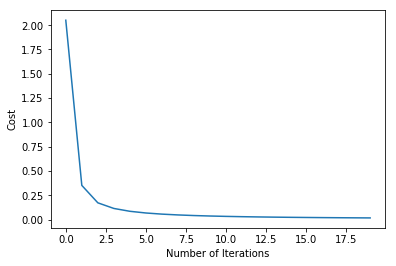

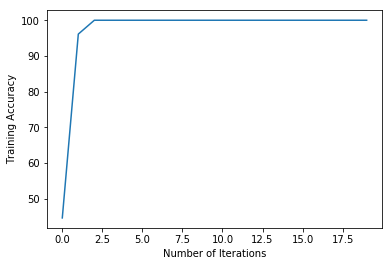

Test Accuracy is : 52.64999999999999


In [38]:
#used to import mnist dataset into the environment
from keras.datasets import mnist
#used only to one hot encode class lables for training purpose
from keras.utils import np_utils

#Importing MNIST data from Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

X_train = x_train.reshape(60000,784)
X_train = X_train.T
y_train = np_utils.to_categorical(y_train)
y_train = y_train.T

#print (X_train.shape)
#print (y_train.shape)

#Normalising data
X_train = X_train*(0.99/255) + 0.01

#Call the class with (X_train, y_train, Num_Hidden units, Activation function, Num_epochs, Learning rate, Batch Size)
MNIST = BPNN(X_train, y_train, 50, "Sigmoid", 20, 0.0001, 32)


#Testing for prediction using testing dataset
X_test = x_test.reshape(10000, 784).T
X_test = X_test*(0.99/255) + 0.01
test_accuracy = MNIST.Test(X_test,y_test)
print ("Test Accuracy is : " +str(test_accuracy))

X shape : (6341, 24)
y shape : (6341,)
Input_Data_Shape : (24, 5072)
Learning Rate : 0.0001
Input Layer Size : 24
Hidden Layer Size : 10
Output Layer Size : 2
Activation Function : Sigmoid
Batch Size : 16
Number of Epochs : 200
First Layer Weight 
(10, 24)
Second Layer Weights 
(2, 10)
First Layer Bias 
(10, 16)
Second Layer Bias 
(2, 16)


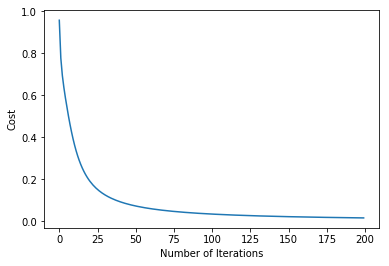

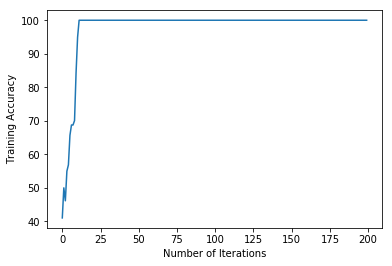

Test Accuracy is : 44.4375


In [44]:
#Reading the data files using pandas
import pandas as pd 
#Used only to one hot encode labels for classification
from keras.utils import np_utils
#used only to split data into training and testing sets
from sklearn.model_selection import train_test_split

file1 = pd.read_excel(r'Madison_Irrigated.xls')
file1 = ((file1-file1.mean())/file1.std())
file1['Labels'] = 0
file1 = file1.to_numpy()
#print (file1.shape)

file2 = pd.read_excel(r'Madison_Rainfed.xls')
file2 = ((file2-file2.mean())/file2.std())
file2['Lables'] = 1
file2 = file2.to_numpy()
#print (file2.shape)

X = np.concatenate((file1,file2), axis=0)
y = X[:,24]
X = np.delete(X,24,axis = 1)
print ("X shape : "+ str(X.shape))
print ("y shape : "+ str(y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = np_utils.to_categorical(y_train)
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T
#print ("X_train shape : "+ str(X_train.shape))
#print ("X_test shape : "+ str(X_test.shape))
#print ("y_train shape : "+ str(y_train.shape))
#print ("y_test shape : "+ str(y_test.shape))

#Call the class with (X_train, y_train, Num_Hidden units, Activation function, Num_epochs, Learning rate, Batch Size)
Madison = BPNN(X_train, y_train, 10, "Sigmoid", 200, 0.0001, 16)
test_accuracy = Madison.Test(X_test,y_test)
print ("Test Accuracy is : " +str(test_accuracy))